In [1]:
import numpy as np
import matplotlib.pyplot as plt

import distance_calculator

Set the highest resolution


### The differences between all methods should be negligible, the smaller the distance
### As the distance increases, the differences between the methods increases

In [2]:
LATITUDE = 45 + 24/60 + 11.398_64/3600
LONGITUDE = -75 - 33/60 - 08.887_65/3600

DLAT = DLON = 0.000_01

## Using the Haversine Spherical Earth approximation

In [3]:
hsine_distance = distance_calculator.calc_haversine_distance(LATITUDE, LONGITUDE, LATITUDE + DLAT, LONGITUDE + DLON)
hsine_distance

1.358656207935236

## Using Ellipsoidal Models
### Differences using WGS84 grid data as reference and comparing with python 

In [7]:
models = ['WGS84', 'clrk66']
distances = list(map(distance_calculator.calc_geodetic_dist, models, [LATITUDE]*len(models), [LONGITUDE]*len(models), [LATITUDE + DLAT]*len(models), [LONGITUDE + DLON]*len(models)))

for model, distance in zip(models + ['Haversine'], distances + [hsine_distance]):
    print(f"Model: {model}")
    print(f'Geodetic distance: {distance} m')

    if model == 'WGS84': pass
    else: print(f'Difference relative to WGS84 model: {(distances[0] - distance)*1e3:.9f} mm')
    print()



Model: WGS84
Geodetic distance: 1.359472243801614 m

Model: clrk66
Geodetic distance: 1.3594791145035416 m
Difference relative to WGS84 model: -0.006870702 mm

Model: Haversine
Geodetic distance: 1.358656207935236 m
Difference relative to WGS84 model: 0.816035866 mm



## Let's go up to 1 x 1 degree delta lat/lon

## The differences can be more noticeable but negligible 

Delta: 0.00001 (deg)
clrk66 Diffrence: -0.006871 mm
Haversine Diffrence:  0.816036 mm
----------------------------------------
Delta: 0.00010 (deg)
clrk66 Diffrence: -0.068710 mm
Haversine Diffrence:  8.160426 mm
----------------------------------------
Delta: 0.00100 (deg)
clrk66 Diffrence: -0.687170 mm
Haversine Diffrence: 81.610839 mm
----------------------------------------
Delta: 0.01000 (deg)
clrk66 Diffrence: -6.879076 mm
Haversine Diffrence: 816.765724 mm
----------------------------------------
Delta: 0.10000 (deg)
clrk66 Diffrence: -69.526932 mm
Haversine Diffrence: 8233.373624 mm
----------------------------------------
Delta: 1.00000 (deg)
clrk66 Diffrence: -768.699677 mm
Haversine Diffrence: 88887.444961 mm
----------------------------------------


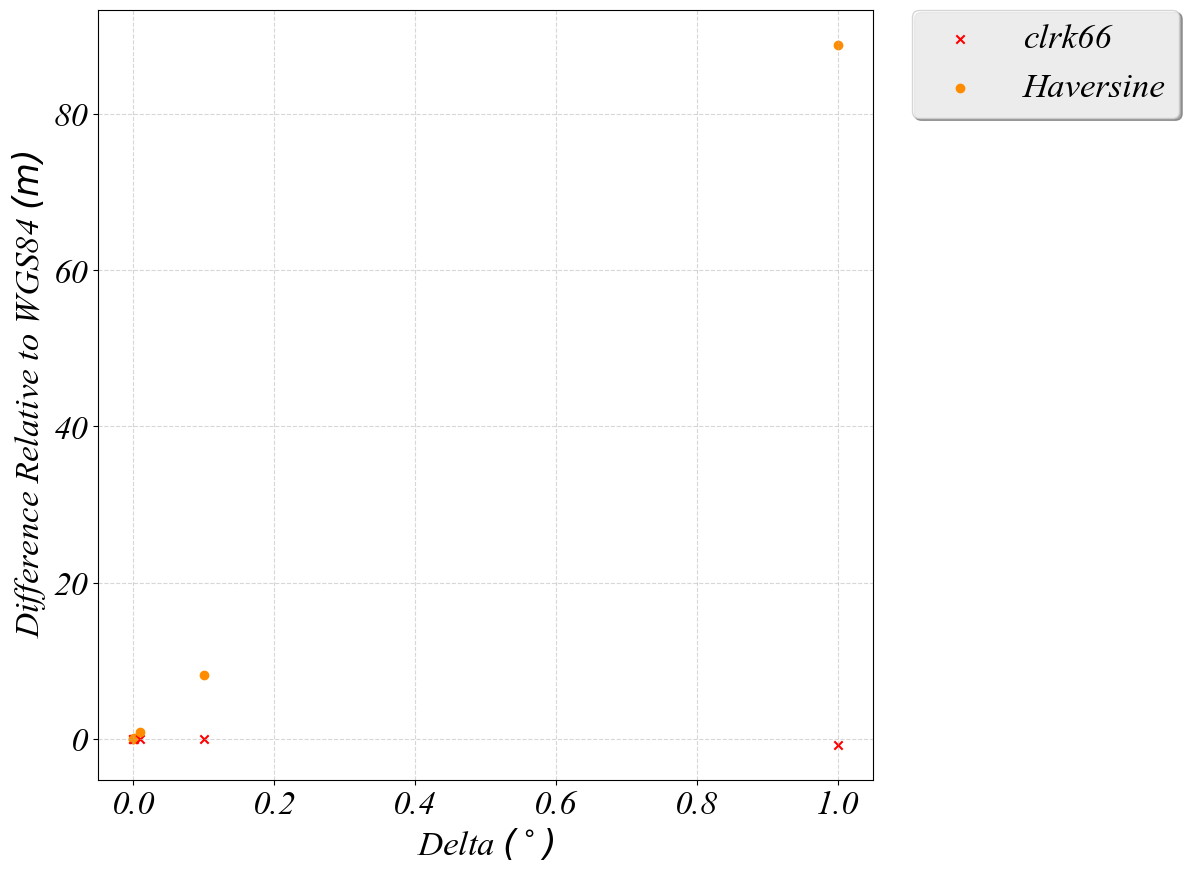

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

for order_mag in range(0, 6):
    delta = 10**(order_mag)*DLON
    
    ref_dist = distance_calculator.calc_geodetic_dist('WGS84', LATITUDE, LONGITUDE, LATITUDE + delta, LONGITUDE + delta)
    hsine_dist = distance_calculator.calc_haversine_distance(LATITUDE, LONGITUDE, LATITUDE + delta, LONGITUDE + delta)
    clrk66_dist = distance_calculator.calc_geodetic_dist('clrk66', LATITUDE, LONGITUDE, LATITUDE + delta, LONGITUDE + delta)
    
    print(f"Delta: {delta:.5f} (deg)")
    for model, dist, color, marker in zip( ['clrk66', 'Haversine'], [clrk66_dist, hsine_dist], [ 'r', 'darkorange'], [ 'x', 'o']):
        
        diff = (ref_dist - dist)
        print(f"{model} Diffrence: {diff*1e3:9f} mm")
        ax.scatter(delta, diff, color=color, marker=marker, label=model if order_mag == 0 else None)
    
    print(f"{'-'*40}")
        
        
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid(ls='--', alpha=0.5)

ax.set_xlabel("Delta $(^\circ)$")
ax.set_ylabel("Difference Relative to WGS84 $( m)$");

## Not even a meter difference between the ellipsoidal methods. To note:
- The difference is always negative, meaning WGS84 is always smaller than CLRK66 
- The difference almost does not scale with distance (only a tiny bit)

## However, the Haversine method clearly has some issues, but we already knew that.